<a href="https://colab.research.google.com/github/bakhshiali/Quantum-Machine-Learning/blob/main/import.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports


In [ ]:
!pip install pennylane

In [ ]:
import pennylane as qml
from pennylane import numpy as np

let's see more example in measurement
. As a full example of combined measurements, let us look at a Bell state $(|00\rangle+|11\rangle)/\sqrt{2}$
, prepared by a Hadamard and CNOT gate.

In [ ]:
dev = qml.device("default.qubit", wires=2, shots=1000)

@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.counts(qml.PauliZ(0)), qml.counts(qml.PauliZ(1)) #qml.counts() #qml.counts(all_outcomes=True) # qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1)), qml.counts() #

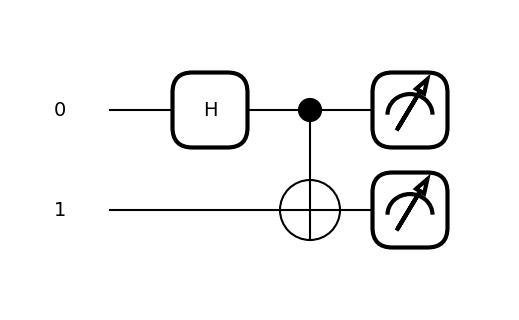

In [ ]:
import matplotlib.pyplot as plt
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(circuit)()
plt.show()

In [ ]:
circuit()

({-1: 480, 1: 520}, {-1: 480, 1: 520})

In [ ]:
dev1 = qml.device("default.qubit", wires=3)

@qml.qnode(dev1)
def circuit1(x, y):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RY(y, wires=1)
    qml.CNOT(wires=[0, 2])
    return qml.probs(wires=[0, 1])

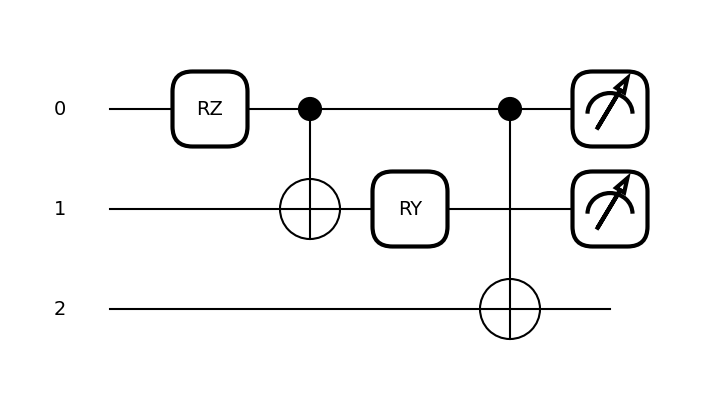

In [ ]:

qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(circuit1)(0.56,0.1)
plt.show()

In [ ]:
circuit1(0.5,0.1)

tensor([0.99750208, 0.00249792, 0.        , 0.        ], requires_grad=True)

# Shots
Let's see shots effect

In [ ]:
shots_list = [5, 10, 1000]
dev3 = qml.device("default.qubit", wires=2, shots=shots_list)

In [ ]:
@qml.qnode(dev3)
def circuit2(x):
    qml.RX(x, wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0) @ qml.PauliX(1)), qml.expval(qml.PauliZ(0))#@:correlated, tensor product

In [ ]:
circuit2(0.5)

((array(-0.6), array(1.)),
 (array(0.), array(0.8)),
 (array(0.036), array(0.864)))

# Gradient and Optimization

In [ ]:
dev4 = qml.device("default.qubit", wires=1)
@qml.qnode(dev4)
def circuit3(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1],wires=0)
    return qml.expval(qml.PauliZ(0))

$\langle Z(0)\rangle=\cos{(params[0])}\cos{(params[1])}$

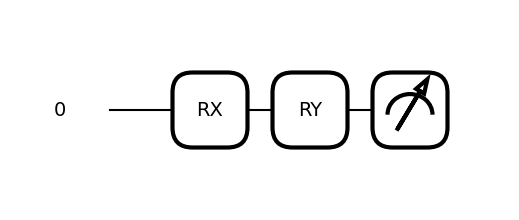

In [ ]:
params=[0,0]
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(circuit3)(params)
plt.show()

In [ ]:
qml.draw(circuit3)(params)

'0: ──RX(0.00)──RY(0.00)─┤  <Z>'

In [ ]:
def cost(params):
    return  circuit3(params)

In [ ]:
params = np.array([0.11,0.5])
opt= qml.GradientDescentOptimizer(0.4)# learning rate: 0.4

steps = 50 #

for i in range(steps):
    params = opt.step(cost, params)
    if (i+1) % 5 == 0:
        print("cost after step {:5d} : {: .7f}".format(i+1,cost(params)))

cost after step     5 : -0.4151640
cost after step    10 : -0.9926820
cost after step    15 : -0.9999554
cost after step    20 : -0.9999997
cost after step    25 : -1.0000000
cost after step    30 : -1.0000000
cost after step    35 : -1.0000000
cost after step    40 : -1.0000000
cost after step    45 : -1.0000000
cost after step    50 : -1.0000000


In [ ]:
circuit3(params)

tensor(-1., requires_grad=True)